In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("crop_production.csv")

In [3]:
df.shape

(246091, 7)

In [4]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [5]:
import seaborn as sns

<AxesSubplot:>

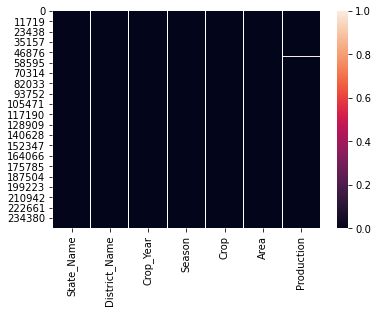

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [9]:
df.shape

(242361, 7)

In [10]:
df.head(2)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
l=LabelEncoder()

In [13]:
df["Crop"].unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Mesta', 'Cowpea(Lobia)',
       'Lemon', 'Pome Granet', 'Sapota', 'Cabbage', 'Rapeseed &Mustard',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Varagu',
       'Garl

In [14]:
State=l.fit_transform(df["State_Name"])
District=l.fit_transform(df["District_Name"])
Season=l.fit_transform(df["Season"])
Crop=l.fit_transform(df["Crop"])

In [15]:
a=df.drop(["State_Name","District_Name","Season","Crop"],axis=1)

In [16]:
a["State"]=State
a["District"]=District
a["Season"]=Season
a["Crop"]=Crop

In [17]:
a


,Crop_Year,Area,Production,State,District,Season,Crop
0,2000,1254.0,2000.0,0,427,1,2
1,2000,2.0,1.0,0,427,1,74
2,2000,102.0,321.0,0,427,1,95
3,2000,176.0,641.0,0,427,4,7
4,2000,720.0,165.0,0,427,4,22
...,...,...,...,...,...,...,...
246086,2014,306.0,801.0,32,471,3,95
246087,2014,627.0,463.0,32,471,3,102
246088,2014,324.0,16250.0,32,471,4,106
246089,2014,279151.0,597899.0,32,471,5,95


In [18]:
X=a.drop("Production",axis=1)

In [19]:
y=a[["Production"]]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
l=LinearRegression()

In [24]:
l.fit(X_train,y_train)

LinearRegression()

In [25]:
value=l.predict(X_test)

In [26]:
value

array([[ 2985768.34477063],
       [  239560.65789153],
       [-1081697.90401635],
       ...,
       [ 1415731.2907363 ],
       [  -93952.59759485],
       [ 2701954.65744523]])

In [27]:
from sklearn.metrics import mean_squared_error,r2_score

In [28]:
mean_squared_error(value,y_test)

265208180590534.06

In [29]:
r2_score(value,y_test)

-165.57632316099128

In [30]:
import matplotlib.pyplot as plt

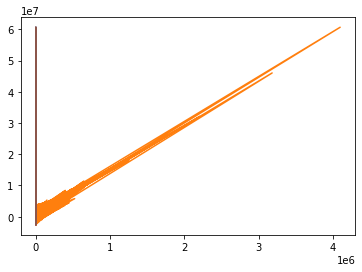

In [31]:
plt.plot(X_test,l.predict(X_test))